This part is for training a model on the species_trait table. Because of the rows' duplication due to the linkage of the 2 table together I will used model for classification to predict the diversity index.

In [1]:
#For dataframe manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) #This line allow to display the entire variables in a dataframe 

#For the data vizualisation
import matplotlib.ticker as tck
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sweetviz as sv

In [2]:
df1 = pd.read_csv("C:/Users/marie/Documents/DSTI_Cours/Python_Class/Python_Lab/Exam_project/Project 2/CoralReefFishSpeciesAssessment/df_ML.csv", sep=",")

In [6]:
df1

,site,Region,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,Total,Nb_dif_Sp,Margalef_Index,Diversity_index
0,4733520_128U,FLA KEYS,9.800000,2.000000,0.550322,23.595392,550.865051,6.992729,88333,1040643,-10.0,1182.842773,3621.320313,0,391,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.260,-0.185,1511066.2,0.047128,3786,0.205000,964.0,32,144.97,0.877755
1,4966028_487U,FLA KEYS,8.821212,6.181818,1.886364,23.578271,577.431946,6.950751,91742,1057990,-6.0,1048.528198,7731.371094,0,733,37045,43641,8378,1.675894,0,70,126,74.0,1.150137e+07,21234.26563,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.403795,503,0.382000,620.0,38,93.19,0.912085
2,4981032_102U,FLA KEYS,17.399239,7.506345,0.749873,23.551355,595.320252,6.950181,94607,1058988,-7.0,1441.421387,6641.421387,0,733,37170,44078,8548,1.676708,0,70,126,126.0,1.210275e+07,13956.82617,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.392888,3430,0.387980,1068.0,26,160.63,0.882112
3,4999782_141U,FLA KEYS,9.200000,10.000000,0.400000,23.556451,590.443543,6.959807,96139,1060134,-7.0,1341.421387,5641.421387,0,733,37198,44369,8603,1.696853,0,70,126,126.0,1.100320e+07,14876.60742,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.386919,3696,0.387980,528.0,19,79.34,0.806049
4,5026033_475U,FLA KEYS,8.558032,2.870486,0.289415,23.567590,579.874023,6.914992,98167,1061388,-14.0,900.000000,4324.264160,16,733,37685,45235,8752,1.697870,0,70,126,126.0,9.313051e+06,14697.00195,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.383887,4090,0.387980,740.0,29,111.25,0.829156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,2065262_3278U,SEFCRI,17.953469,1.000000,0.834130,24.261774,453.504700,7.363275,76608,972777,-27.0,200.000000,3752.691162,935,3615,924228,3882796,128369,54.825044,0,53,17,1137.0,3.750273e+06,353222.28130,23.764472,-0.105,-0.128,-0.260,-0.185,318050.4,12.064380,6958,0.709000,257.0,26,38.54,0.829341
3995,1223281_1188U,FLA KEYS,7.148084,1.246807,0.498723,23.749170,583.637329,7.319593,146627,1164044,-7.0,1900.000000,3662.741699,23,561,6281,45292,9544,1.779467,0,91,62,110.0,1.641656e+07,489712.90630,28.308633,-0.013,-0.027,-0.185,-0.056,855670.2,0.042837,7602,0.396981,218.0,27,32.67,0.831818
3996,2003949_1803U,FLA KEYS,2.455478,1.795652,0.535043,24.121240,553.635559,7.216960,40370,1045473,-17.0,600.000000,16131.371090,0,2615,16262,2940764,99823,43.641268,0,48,12,559.0,3.953954e+07,18971.01172,40.843137,-0.158,-0.129,-0.260,-0.185,318050.4,0.402824,5480,0.705000,755.0,27,113.51,0.824709
3997,1966838_3070U,SEFCRI,8.145070,1.000000,0.601972,24.224939,386.825714,7.371410,85071,945826,-6.0,1300.000000,10672.791990,1038,4301,1261033,4144337,133019,57.419664,0,53,20,17036.0,4.721569e+04,77573.35156,21.638298,-0.105,-0.128,-0.260,-0.185,318050.4,14.823301,3575,0.740000,208.0,16,31.16,0.857023


In first we prepare the dataset for the machine learning algorithm by encode the character variable Region, Multihabitat, Family, size_group and swim mode. Then we divided the predictives variable in the X set and the target in the y set. Then both data set are divided in train and test. The splitting will be set as random_state=0 and the train will take 80% of the total dataset en the test 20%. 

In [7]:
#Character columns encode with dummies.
categorical_cols = df1['Region']

In [9]:
test = pd.get_dummies(categorical_cols, dtype=float)

In [10]:
test

,DRY TORT,FLA KEYS,SEFCRI
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
3994,0.0,0.0,1.0
3995,0.0,1.0,0.0
3996,0.0,1.0,0.0
3997,0.0,0.0,1.0


In [11]:
df1_processed = pd.concat([df1, test], axis=1)

In [12]:
df1_processed.drop(['Region'], axis =1)

,site,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,Total,Nb_dif_Sp,Margalef_Index,Diversity_index,DRY TORT,FLA KEYS,SEFCRI
0,4733520_128U,9.800000,2.000000,0.550322,23.595392,550.865051,6.992729,88333,1040643,-10.0,1182.842773,3621.320313,0,391,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.260,-0.185,1511066.2,0.047128,3786,0.205000,964.0,32,144.97,0.877755,0.0,1.0,0.0
1,4966028_487U,8.821212,6.181818,1.886364,23.578271,577.431946,6.950751,91742,1057990,-6.0,1048.528198,7731.371094,0,733,37045,43641,8378,1.675894,0,70,126,74.0,1.150137e+07,21234.26563,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.403795,503,0.382000,620.0,38,93.19,0.912085,0.0,1.0,0.0
2,4981032_102U,17.399239,7.506345,0.749873,23.551355,595.320252,6.950181,94607,1058988,-7.0,1441.421387,6641.421387,0,733,37170,44078,8548,1.676708,0,70,126,126.0,1.210275e+07,13956.82617,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.392888,3430,0.387980,1068.0,26,160.63,0.882112,0.0,1.0,0.0
3,4999782_141U,9.200000,10.000000,0.400000,23.556451,590.443543,6.959807,96139,1060134,-7.0,1341.421387,5641.421387,0,733,37198,44369,8603,1.696853,0,70,126,126.0,1.100320e+07,14876.60742,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.386919,3696,0.387980,528.0,19,79.34,0.806049,0.0,1.0,0.0
4,5026033_475U,8.558032,2.870486,0.289415,23.567590,579.874023,6.914992,98167,1061388,-14.0,900.000000,4324.264160,16,733,37685,45235,8752,1.697870,0,70,126,126.0,9.313051e+06,14697.00195,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.383887,4090,0.387980,740.0,29,111.25,0.829156,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,2065262_3278U,17.953469,1.000000,0.834130,24.261774,453.504700,7.363275,76608,972777,-27.0,200.000000,3752.691162,935,3615,924228,3882796,128369,54.825044,0,53,17,1137.0,3.750273e+06,353222.28130,23.764472,-0.105,-0.128,-0.260,-0.185,318050.4,12.064380,6958,0.709000,257.0,26,38.54,0.829341,0.0,0.0,1.0
3995,1223281_1188U,7.148084,1.246807,0.498723,23.749170,583.637329,7.319593,146627,1164044,-7.0,1900.000000,3662.741699,23,561,6281,45292,9544,1.779467,0,91,62,110.0,1.641656e+07,489712.90630,28.308633,-0.013,-0.027,-0.185,-0.056,855670.2,0.042837,7602,0.396981,218.0,27,32.67,0.831818,0.0,1.0,0.0
3996,2003949_1803U,2.455478,1.795652,0.535043,24.121240,553.635559,7.216960,40370,1045473,-17.0,600.000000,16131.371090,0,2615,16262,2940764,99823,43.641268,0,48,12,559.0,3.953954e+07,18971.01172,40.843137,-0.158,-0.129,-0.260,-0.185,318050.4,0.402824,5480,0.705000,755.0,27,113.51,0.824709,0.0,1.0,0.0
3997,1966838_3070U,8.145070,1.000000,0.601972,24.224939,386.825714,7.371410,85071,945826,-6.0,1300.000000,10672.791990,1038,4301,1261033,4144337,133019,57.419664,0,53,20,17036.0,4.721569e+04,77573.35156,21.638298,-0.105,-0.128,-0.260,-0.185,318050.4,14.823301,3575,0.740000,208.0,16,31.16,0.857023,0.0,0.0,1.0


In [13]:
df1_processed.columns

Index(['site', 'Region', 'Depth', 'Coral_cover', 'Reef_complexity', 'SST',
       'NPP', 'Wave_exposure', 'Coral_area_UFRTM_20km',
       'Coral_area_UFRTM_200km', 'Depth_Sbrocco', 'Deepwater', 'FSA',
       'Marina_slips_10km', 'Marina_slips_25km', 'Population_20km',
       'Population_50km', 'Recreational_fishermen_50km', 'Tourist_fishing',
       'Artificial_reefs_1km', 'SG_permits_50km', 'SG_charter_permits_25km',
       'Total_gravity', 'Nursery_seagrass', 'Nursery_mangroves',
       'connectivity', 'Comm_engagement', 'Comm_reliance', 'Rec_engagement',
       'Rec_reliance', 'Commercial_pounds_landed', 'Pop_per_area_reef_20km',
       'Random', 'impact', 'Total', 'Nb_dif_Sp', 'Margalef_Index',
       'Diversity_index', 'DRY TORT', 'FLA KEYS', 'SEFCRI'],
      dtype='object')

In [16]:
df1_processed = df1_processed.loc[:, ['Depth', 'Coral_cover', 'Reef_complexity', 'SST',
       'NPP', 'Wave_exposure', 'Coral_area_UFRTM_20km',
       'Coral_area_UFRTM_200km', 'Depth_Sbrocco', 'Deepwater', 'FSA',
       'Marina_slips_10km', 'Marina_slips_25km', 'Population_20km',
       'Population_50km', 'Recreational_fishermen_50km', 'Tourist_fishing',
       'Artificial_reefs_1km', 'SG_permits_50km', 'SG_charter_permits_25km',
       'Total_gravity', 'Nursery_seagrass', 'Nursery_mangroves',
       'connectivity', 'Comm_engagement', 'Comm_reliance', 'Rec_engagement',
       'Rec_reliance', 'Commercial_pounds_landed', 'Pop_per_area_reef_20km',
       'Random', 'impact', 'Total', 'Nb_dif_Sp', 'Margalef_Index', 'DRY TORT', 'FLA KEYS', 'SEFCRI',
       'Diversity_index']]

In [17]:
df1_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Depth                        3999 non-null   float64
 1   Coral_cover                  3999 non-null   float64
 2   Reef_complexity              3999 non-null   float64
 3   SST                          3999 non-null   float64
 4   NPP                          3999 non-null   float64
 5   Wave_exposure                3999 non-null   float64
 6   Coral_area_UFRTM_20km        3999 non-null   int64  
 7   Coral_area_UFRTM_200km       3999 non-null   int64  
 8   Depth_Sbrocco                3999 non-null   float64
 9   Deepwater                    3999 non-null   float64
 10  FSA                          3999 non-null   float64
 11  Marina_slips_10km            3999 non-null   int64  
 12  Marina_slips_25km            3999 non-null   int64  
 13  Population_20km   

In [18]:
df1_processed

,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,Deepwater,FSA,Marina_slips_10km,Marina_slips_25km,Population_20km,Population_50km,Recreational_fishermen_50km,Tourist_fishing,Artificial_reefs_1km,SG_permits_50km,SG_charter_permits_25km,Total_gravity,Nursery_seagrass,Nursery_mangroves,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,Total,Nb_dif_Sp,Margalef_Index,DRY TORT,FLA KEYS,SEFCRI,Diversity_index
0,9.800000,2.000000,0.550322,23.595392,550.865051,6.992729,88333,1040643,-10.0,1182.842773,3621.320313,0,391,4163,41070,7446,1.649034,0,54,0,69.0,6.483631e+06,199409.31250,4.618931,-0.158,-0.129,-0.260,-0.185,1511066.2,0.047128,3786,0.205000,964.0,32,144.97,0.0,1.0,0.0,0.877755
1,8.821212,6.181818,1.886364,23.578271,577.431946,6.950751,91742,1057990,-6.0,1048.528198,7731.371094,0,733,37045,43641,8378,1.675894,0,70,126,74.0,1.150137e+07,21234.26563,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.403795,503,0.382000,620.0,38,93.19,0.0,1.0,0.0,0.912085
2,17.399239,7.506345,0.749873,23.551355,595.320252,6.950181,94607,1058988,-7.0,1441.421387,6641.421387,0,733,37170,44078,8548,1.676708,0,70,126,126.0,1.210275e+07,13956.82617,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.392888,3430,0.387980,1068.0,26,160.63,0.0,1.0,0.0,0.882112
3,9.200000,10.000000,0.400000,23.556451,590.443543,6.959807,96139,1060134,-7.0,1341.421387,5641.421387,0,733,37198,44369,8603,1.696853,0,70,126,126.0,1.100320e+07,14876.60742,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.386919,3696,0.387980,528.0,19,79.34,0.0,1.0,0.0,0.806049
4,8.558032,2.870486,0.289415,23.567590,579.874023,6.914992,98167,1061388,-14.0,900.000000,4324.264160,16,733,37685,45235,8752,1.697870,0,70,126,126.0,9.313051e+06,14697.00195,9.984375,-0.158,-0.129,-0.260,-0.185,855670.2,0.383887,4090,0.387980,740.0,29,111.25,0.0,1.0,0.0,0.829156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,17.953469,1.000000,0.834130,24.261774,453.504700,7.363275,76608,972777,-27.0,200.000000,3752.691162,935,3615,924228,3882796,128369,54.825044,0,53,17,1137.0,3.750273e+06,353222.28130,23.764472,-0.105,-0.128,-0.260,-0.185,318050.4,12.064380,6958,0.709000,257.0,26,38.54,0.0,0.0,1.0,0.829341
3995,7.148084,1.246807,0.498723,23.749170,583.637329,7.319593,146627,1164044,-7.0,1900.000000,3662.741699,23,561,6281,45292,9544,1.779467,0,91,62,110.0,1.641656e+07,489712.90630,28.308633,-0.013,-0.027,-0.185,-0.056,855670.2,0.042837,7602,0.396981,218.0,27,32.67,0.0,1.0,0.0,0.831818
3996,2.455478,1.795652,0.535043,24.121240,553.635559,7.216960,40370,1045473,-17.0,600.000000,16131.371090,0,2615,16262,2940764,99823,43.641268,0,48,12,559.0,3.953954e+07,18971.01172,40.843137,-0.158,-0.129,-0.260,-0.185,318050.4,0.402824,5480,0.705000,755.0,27,113.51,0.0,1.0,0.0,0.824709
3997,8.145070,1.000000,0.601972,24.224939,386.825714,7.371410,85071,945826,-6.0,1300.000000,10672.791990,1038,4301,1261033,4144337,133019,57.419664,0,53,20,17036.0,4.721569e+04,77573.35156,21.638298,-0.105,-0.128,-0.260,-0.185,318050.4,14.823301,3575,0.740000,208.0,16,31.16,0.0,0.0,1.0,0.857023


In [112]:
#Extraction of the value from the dataset
X = df1_processed.iloc[:, :38].values
y = df1_processed.iloc[:, 38].values

In [113]:
X , y

(array([[ 9.8       ,  2.        ,  0.55032175, ...,  0.        ,
          1.        ,  0.        ],
        [ 8.82121212,  6.18181818,  1.88636364, ...,  0.        ,
          1.        ,  0.        ],
        [17.39923858,  7.50634518,  0.7498731 , ...,  0.        ,
          1.        ,  0.        ],
        ...,
        [ 2.45547826,  1.79565217,  0.53504348, ...,  0.        ,
          1.        ,  0.        ],
        [ 8.14507042,  1.        ,  0.60197183, ...,  0.        ,
          0.        ,  1.        ],
        [14.34458834,  1.        ,  0.55120259, ...,  0.        ,
          0.        ,  1.        ]]),
 array([0.87775494, 0.91208505, 0.88211198, ..., 0.82470884, 0.85702341,
        0.74579762]))

In [114]:
X[np.isnan(X)] = 0

In [126]:
#split the dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0)

In [127]:
#The data are scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [128]:
from sklearn.ensemble import RandomForestRegressor

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=100, random_state=0, oob_score=True)

# Fit the regressor with x and y data
regressor.fit(X_train, y_train)


RandomForestRegressor(oob_score=True, random_state=0)

We calculate the Out of Bag score (OOB) of our random forest 

In [129]:
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.4686903190857443


In [130]:
# Making predictions on the same data or new data
predictions = regressor.predict(X_test)

Evaluation of the models

In [131]:
# Evaluating the model
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, root_mean_squared_error

# Evaluating the model
mae_RF = mean_absolute_error(y_test, predictions)
mse_RF = mean_squared_error(y_test, predictions)
r_squared_RF = r2_score(y_test, predictions)
rmse_RF = np.sqrt(mse_RF)

# Print the evaluation metrics
print('Mean Absolute Error (MAE):', mae_RF)
print('Mean Squared Error (MSE):', mse_RF)
print('R-squared (R²):', r_squared_RF)
print('Root Mean Squared Error (RMSE):', rmse_RF)


Mean Absolute Error (MAE): 0.05436574101775624
Mean Squared Error (MSE): 0.00678607689337857
R-squared (R²): 0.37952558399006797
Root Mean Squared Error (RMSE): 0.08237764802043435


The MAE shows that, on average the model is approximatively 6% away from the diversity index
The MSE shows that the squared prediction errors are approximatively 0.008 this show the model fit high with the data. 
The R² shows that the model can explain only 24% of the total variance 
The RMSE indicates that, the model's predictions have an error of approximately 0.09 in the same units as the diversity index. 

Those metrics suggest the model fit to high with the data. 

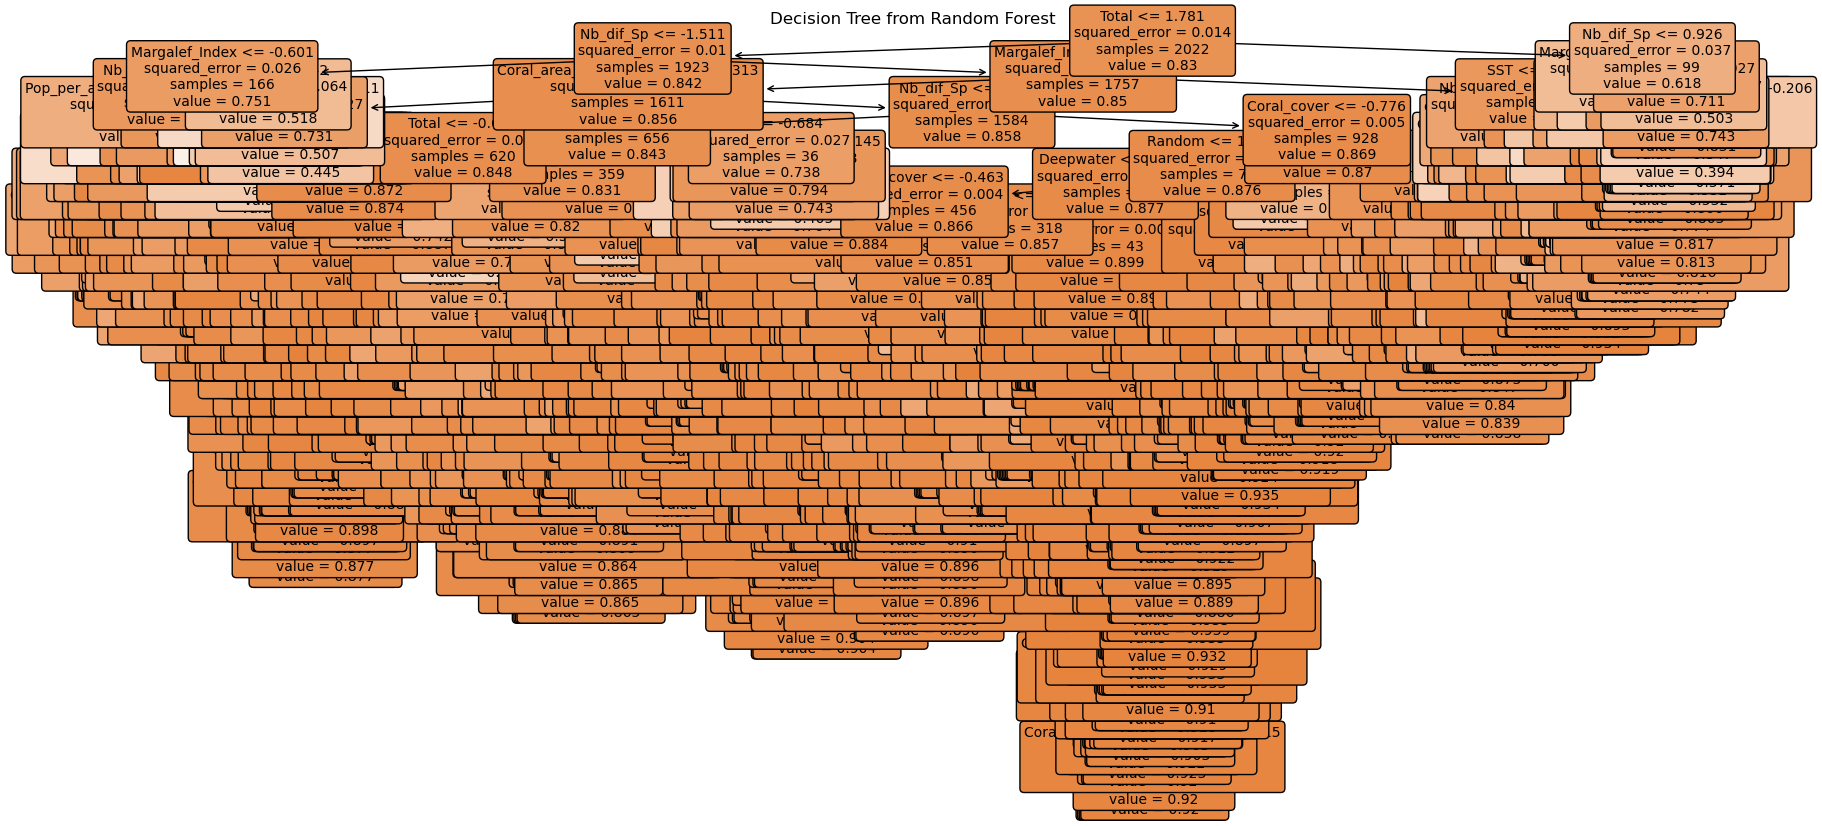

In [87]:
from sklearn.tree import plot_tree

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = regressor.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df1_processed.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()


Ridge regression with cross validation

In [140]:
from sklearn.linear_model import RidgeCV
clf = RidgeCV(alphas = [1e-3, 1e-2, 1e-1, 1], cv = 10).fit(X_train, y_train)

In [141]:
y_pred = clf.predict(X_test)

In [142]:
# Evaluating the model
mae_clf = mean_absolute_error(y_test, y_pred)
mse_clf = mean_squared_error(y_test, y_pred)
r_squared_clf = r2_score(y_test, y_pred)
rmse_clf = np.sqrt(mse_clf)

# Print the evaluation metrics
print('The metrics for the Ridge model with cross validation')
print('Mean Absolute Error (MAE):', mae_clf)
print('Mean Squared Error (MSE):', mse_clf)
print('R-squared (R²):', r_squared_clf)
print('Root Mean Squared Error (RMSE):', rmse_clf)
print()
print('The metrics for the Random Forest model')
print('Mean Absolute Error (MAE):', mae_RF)
print('Mean Squared Error (MSE):', mse_RF)
print('R-squared (R²):', r_squared_RF)
print('Root Mean Squared Error (RMSE):', rmse_RF)

The metrics for the Ridge model with cross validation
Mean Absolute Error (MAE): 0.05831049013438829
Mean Squared Error (MSE): 0.007593994128267076
R-squared (R²): 0.3056549246418171
Root Mean Squared Error (RMSE): 0.08714352602613161

The metrics for the Random Forest model
Mean Absolute Error (MAE): 0.05436574101775624
Mean Squared Error (MSE): 0.00678607689337857
R-squared (R²): 0.37952558399006797
Root Mean Squared Error (RMSE): 0.08237764802043435


Models test with this dataset linear regression and random forest